## Importing packages

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

## Loading the dataset

#### The data used for this project was located in the river_water_parameters.csv file. To better manipulate and analyse this file, it was loaded into a Pandas data frame using the Pandas function, .read_csv() 

In [3]:
# loading dataset

df = pd.read_csv('river_water_parameters.csv')

In [5]:
# Show sample of the dataset

df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\r\n(µS/cm),TDS\r\n(mg/L),TSS\r\n(mL sed/L),DO\r\n(mg/L),Level (cm),Turbidity (NTU),Hardness\r\n(mg CaCO3/L),Hardness classification,Total Cl-\r\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [7]:
# Display number of rows and columns of the dataframe

df.shape

(219, 16)

In [9]:
df.columns

Index(['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point',
       'Ambient temperature (°C)', 'Ambient humidity',
       'Sample temperature (°C)', 'pH', 'EC\r\n(µS/cm)', 'TDS\r\n(mg/L)',
       'TSS\r\n(mL sed/L)', 'DO\r\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)',
       'Hardness\r\n(mg CaCO3/L)', 'Hardness classification',
       'Total Cl-\r\n(mg Cl-/L)'],
      dtype='object')

#### The dataset consists of 219 rows (observations) and 16 columns (features)

In [5]:
# Display summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)               219 non-null    int64  
 8   TDS
(mg/L)               219 non-null    int64  
 9   TSS
(mL sed/L)           213 non-null    float64
 10  DO
(mg/L)                219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)    217 non-null    float64
 14  Hardness classi

## Data cleaning

In [11]:
# Change column names 

# Renaming columns
df = df.rename(columns={'Date (DD/MM/YYYY)': 'Date', 
                        'Time (24 hrs XX:XX)': 'Time', 
                        'Ambient temperature (°C)': 'Ambient temperature',
                        'Sample temperature (°C)': 'Sample temperature', 
                        'EC\r\n(µS/cm)': 'EC', 
                        'TDS\r\n(mg/L)': 'TDS',
                        'TSS\r\n(mL sed/L)': 'TSS', 
                        'DO\r\n(mg/L)': 'DO', 
                        'Level (cm)': 'Level',
                        'Turbidity (NTU)': 'Turbidity', 
                        'Hardness\r\n(mg CaCO3/L)': 'Hardness', 
                        'Total Cl-\r\n(mg Cl-/L)': 'Total Cl'})

In [13]:
# Check null values

df.isna().sum()

Date                        0
Time                        0
Sampling point              0
Ambient temperature         0
Ambient humidity            0
Sample temperature          0
pH                          0
EC                          0
TDS                         0
TSS                         6
DO                          0
Level                      39
Turbidity                   1
Hardness                    2
Hardness classification     2
Total Cl                    6
dtype: int64

#### The columns TSS, Level, Turbidity, Hardness, Hardness classification and Total Cl have null values. The level column has the highest number of null values (36)

In [15]:
# Imputing the null values for each column

# Fill missing TSS\n(mL sed/L) with the mean TSS
df['TSS'] = df['TSS'].fillna(df['TSS'].mean())

# Fill missing Level values with 0
df['Level'] = df['Level'].fillna(0)

# Fill missing Turbidity (NTU) with the mean Turbidity
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].mean())

# Fill missing Hardness\n(mg CaCO3/L) with the mean Hardness\n(mg CaCO3/L)
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].mean())

# Fill missing Hardness classification with the mode Hardness classification 
df['Hardness classification'] = df['Hardness classification'].fillna(df['Hardness classification'].mode())

# Fill missing Total Cl-\n(mg Cl-/L)  with the mean Total Cl-\n(mg Cl-/L) 
df['Total Cl'] = df['Total Cl'].fillna(df['Total Cl'].mean())

In [17]:
# Count number of duplicate rows

num_duplicates = df.duplicated().sum()
num_duplicates

0

#### There are no duplicated rows

In [19]:
# Count number of unique values in each column

df.nunique()

Date                        23
Time                        31
Sampling point               5
Ambient temperature         21
Ambient humidity            18
Sample temperature          89
pH                          16
EC                          90
TDS                         54
TSS                         44
DO                         179
Level                       16
Turbidity                  187
Hardness                    65
Hardness classification      2
Total Cl                    68
dtype: int64

## Exploratory Data Analysis (EDA)

In [21]:
## Change date and time oclumns to datetime types

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [23]:
# separate numerical and categorical data


num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

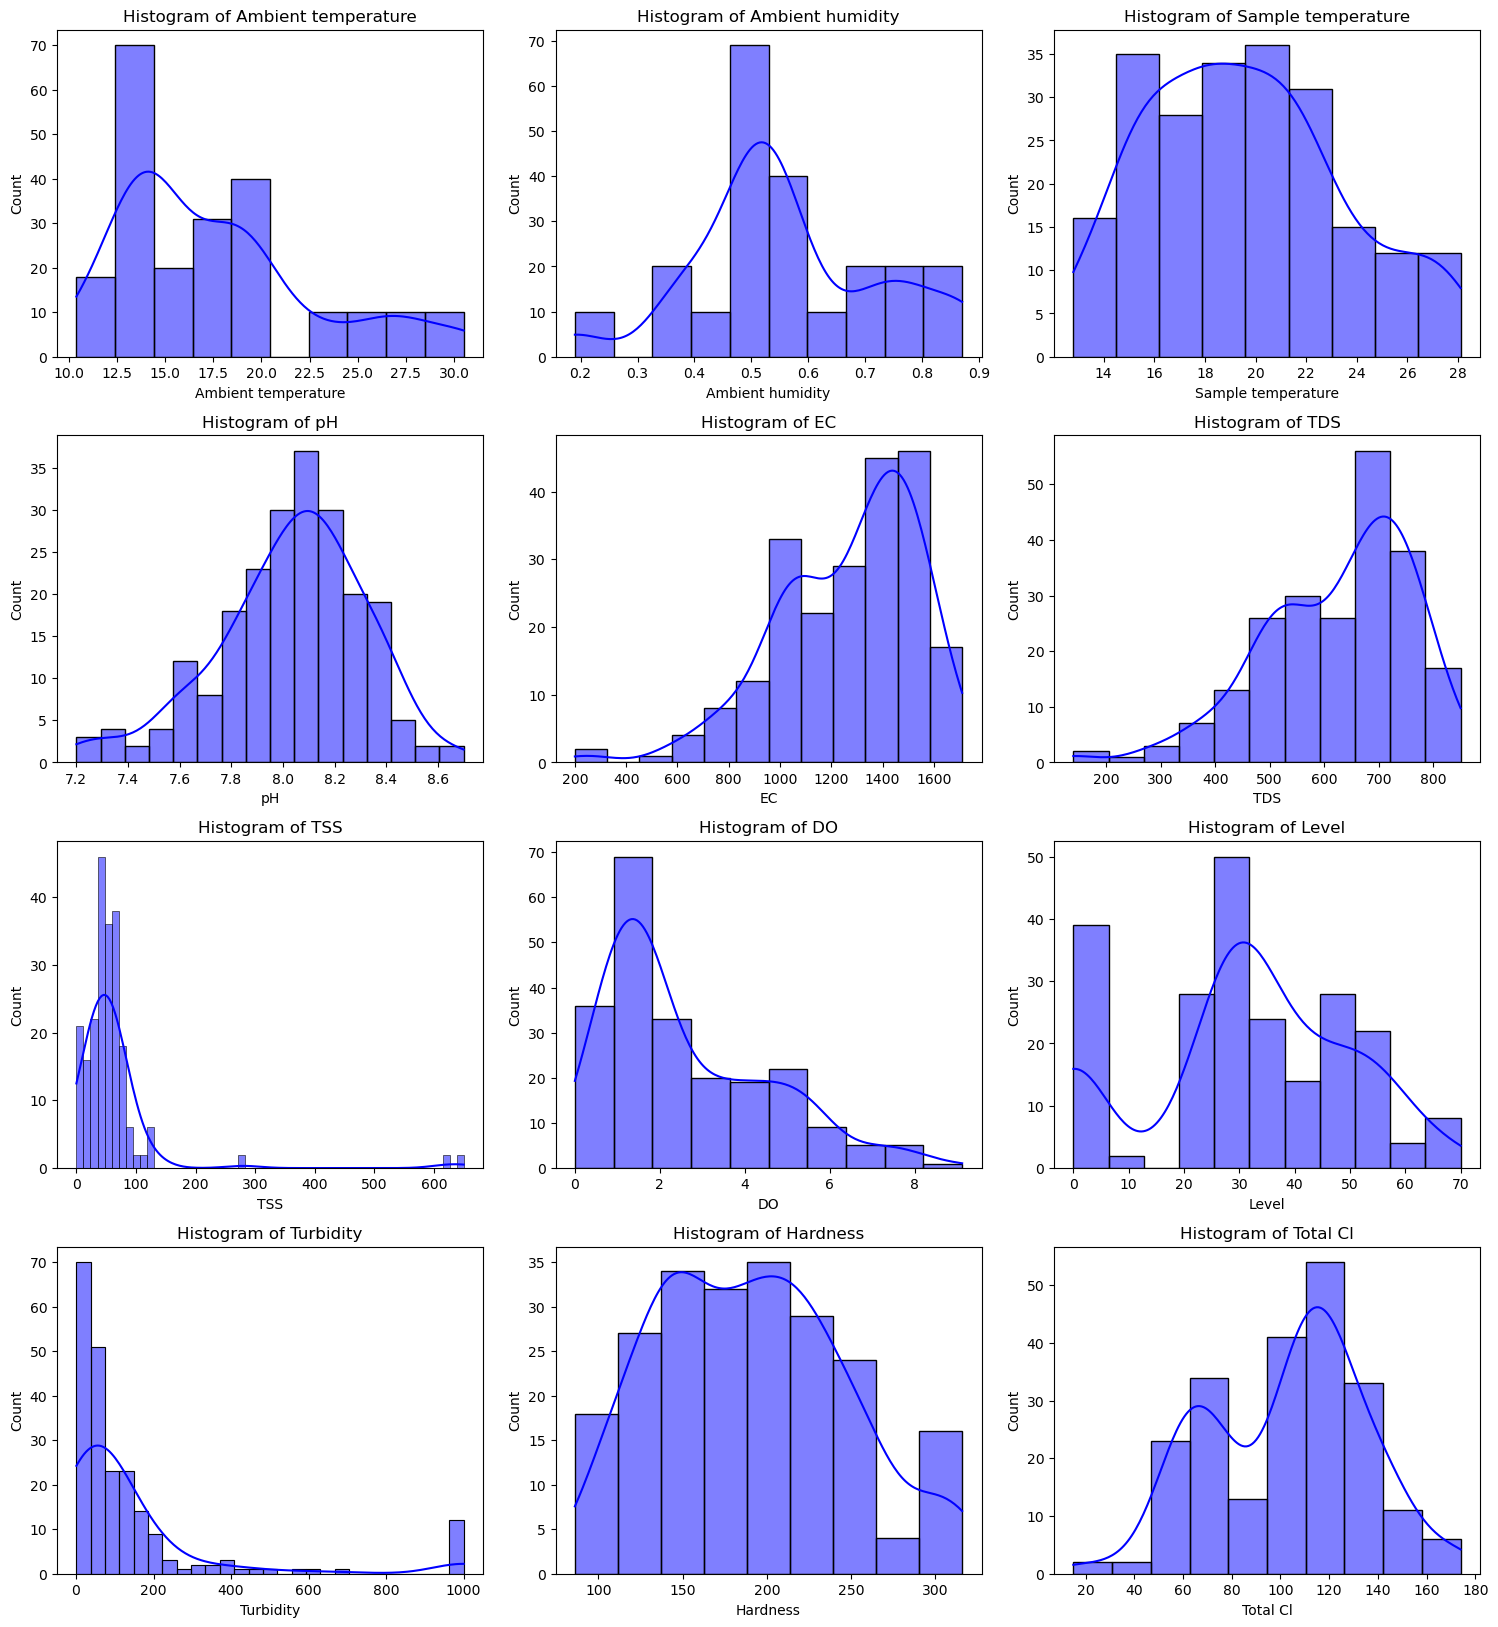

In [17]:
# Histograms for numerical columns

plt.figure(figsize = (15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde = True, color = 'blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

#### Observations

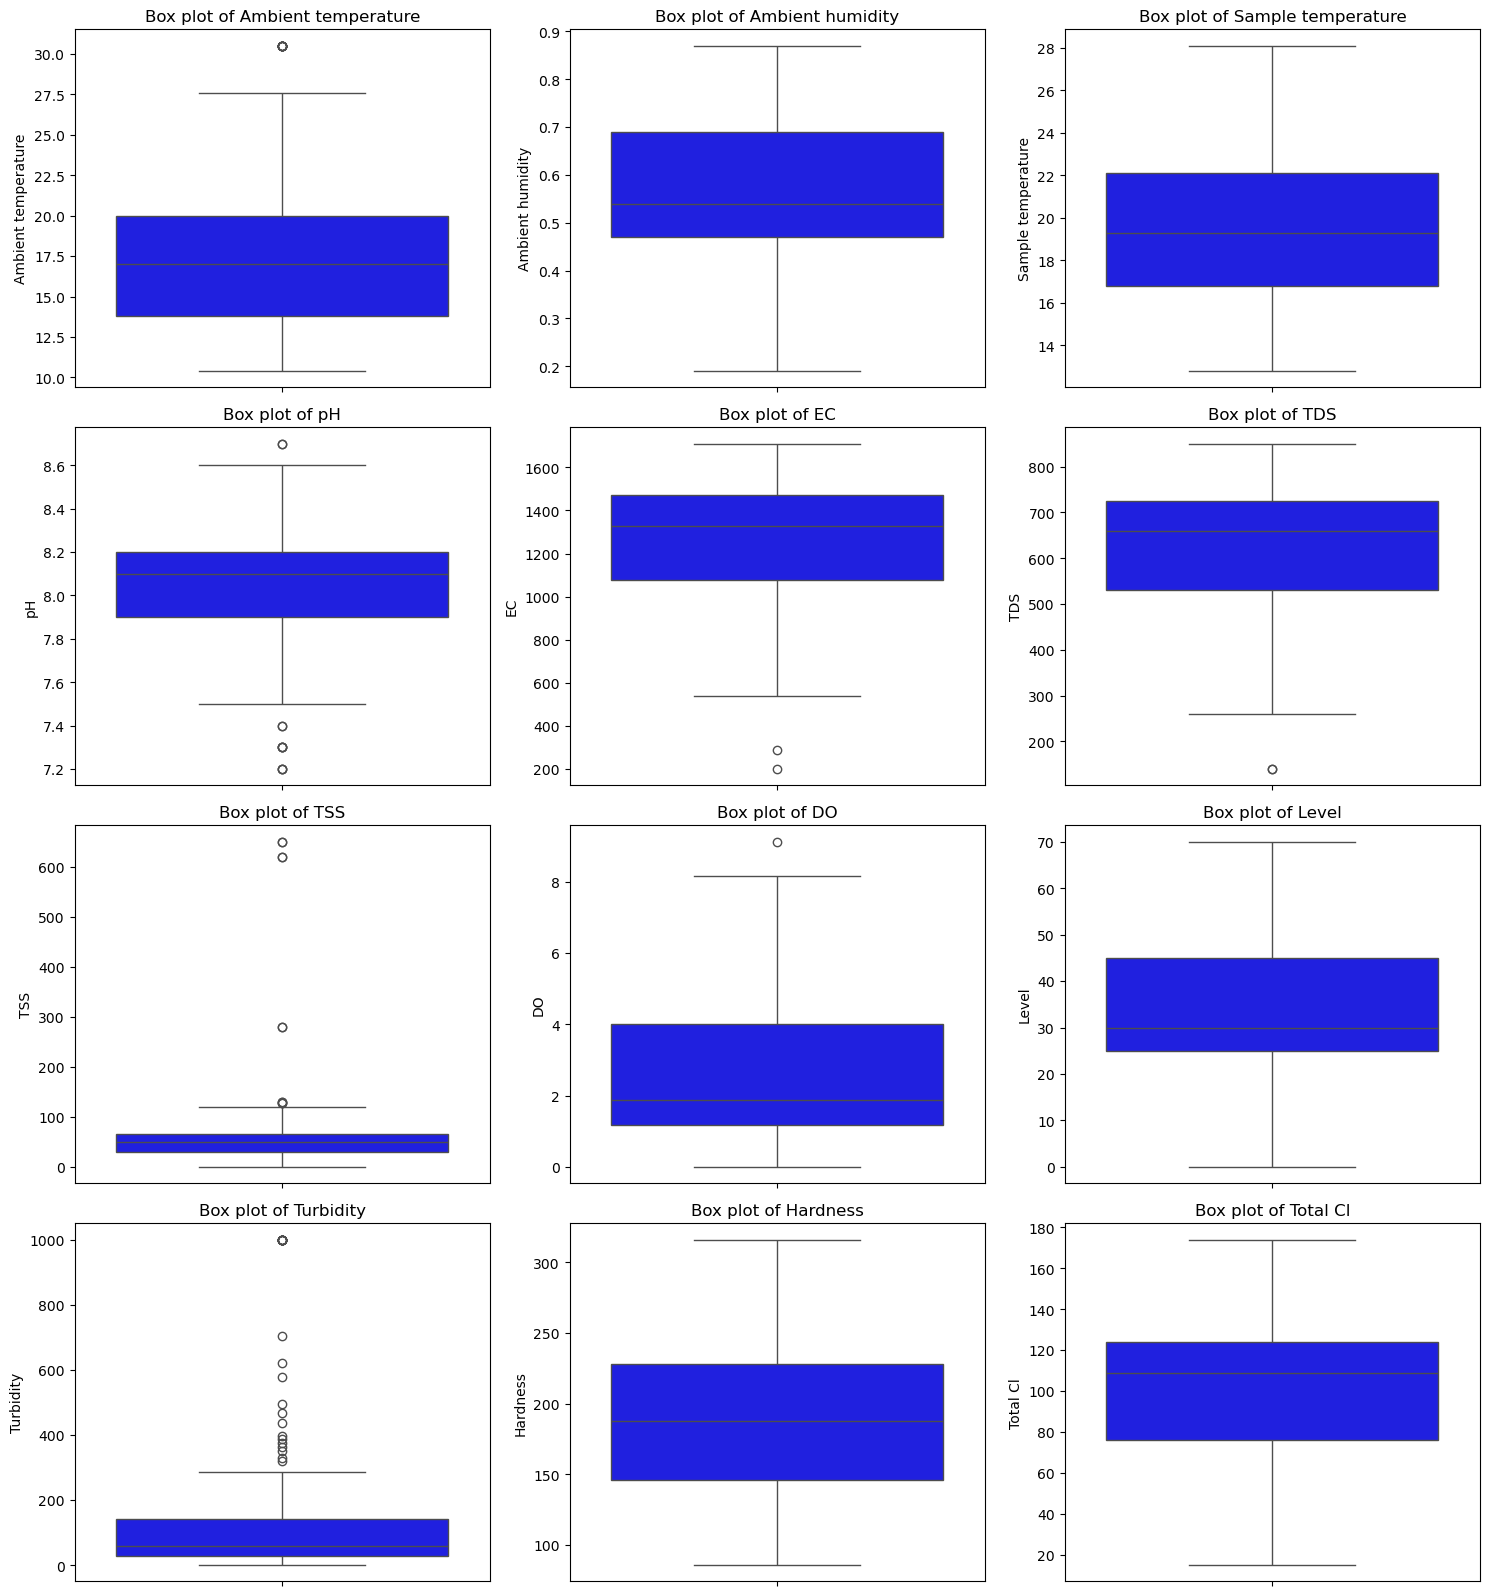

In [18]:
# Box plots for numerical columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col], color = 'blue')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

#### Observations

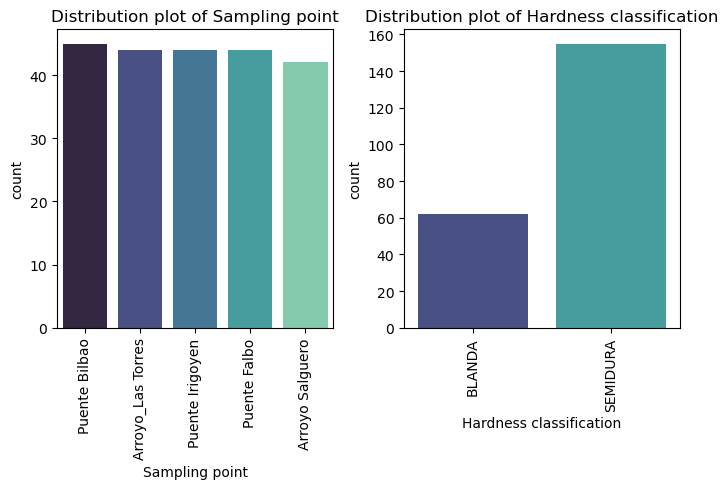

In [19]:
# Count plots for categorical columns

plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    if col != 'Time':
        plt.subplot(math.ceil(len(cat_cols) / 3), 3, i + 1)
        sns.countplot(x = df[col], palette = 'mako')
        plt.title(f'Distribution plot of {col}')
        plt.xticks(rotation = 90)
        plt.tight_layout()
plt.show()

#### Observations

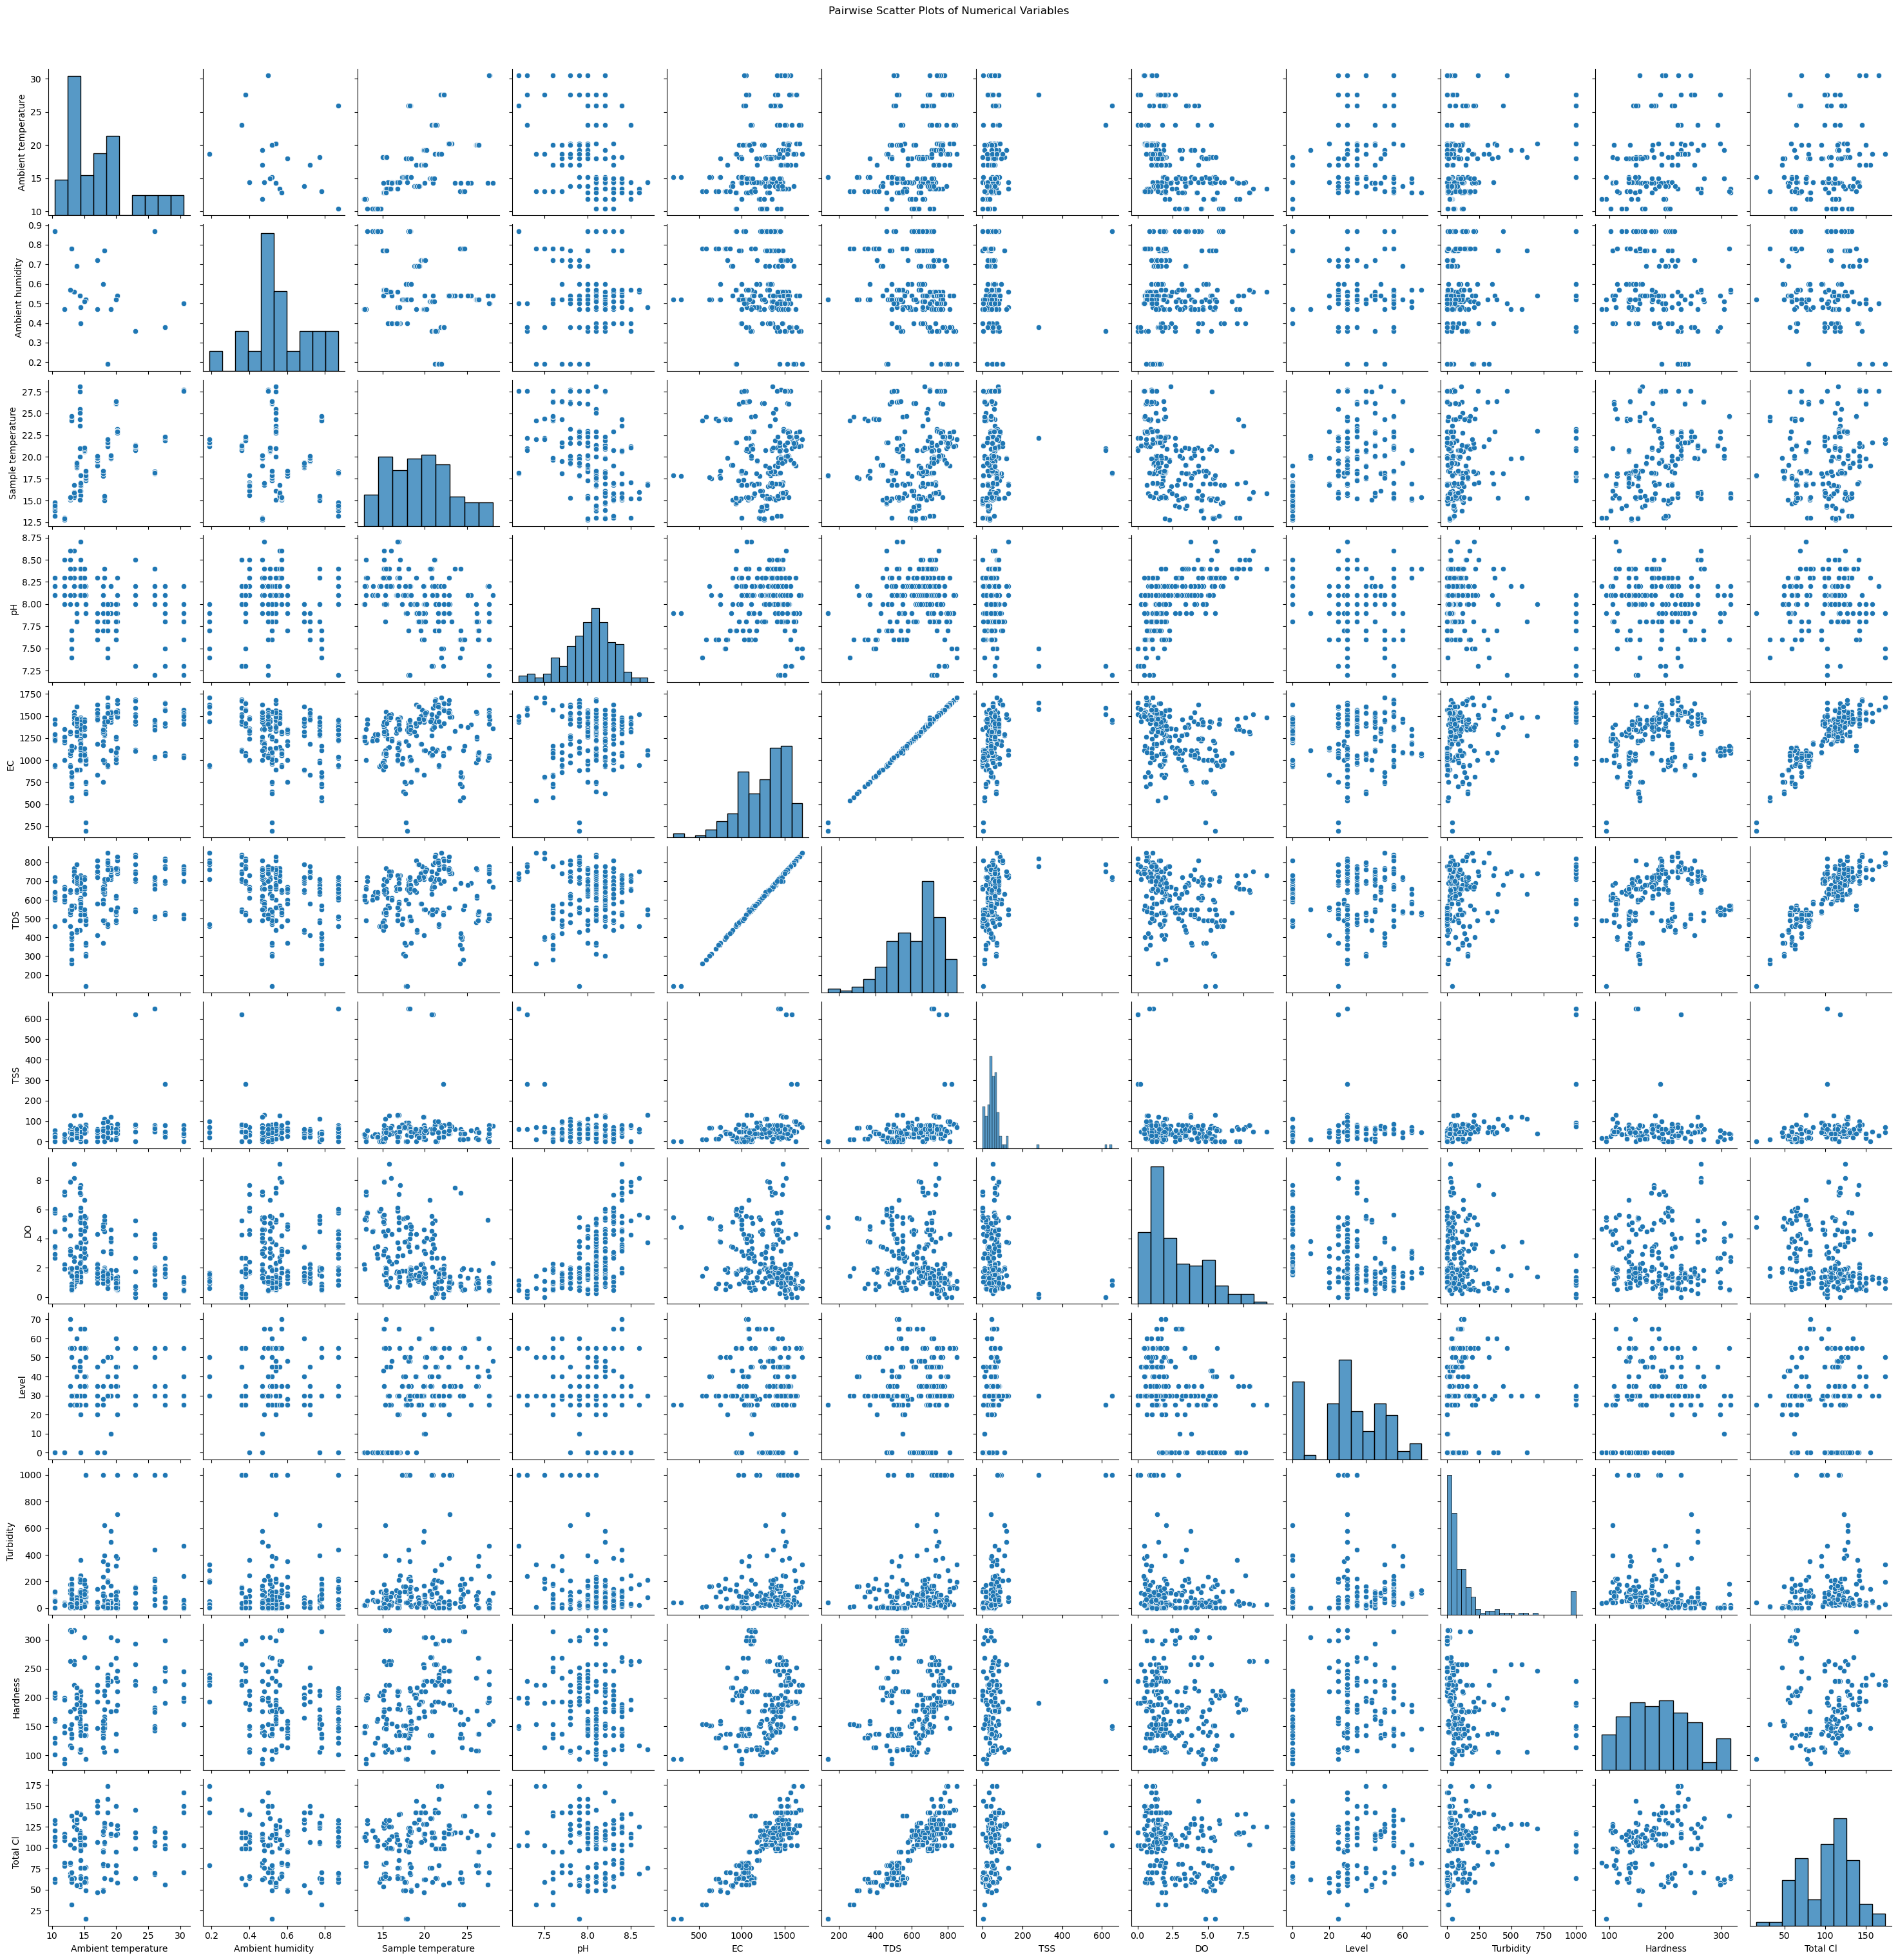

In [20]:
# Create pairwise scatter plots for numerical variables 

sns.pairplot(df, vars = num_cols, palette = 'Set1') 
plt.suptitle('Pairwise Scatter Plots of Numerical Variables', y=1.02)
plt.show()

## Date and time analysis

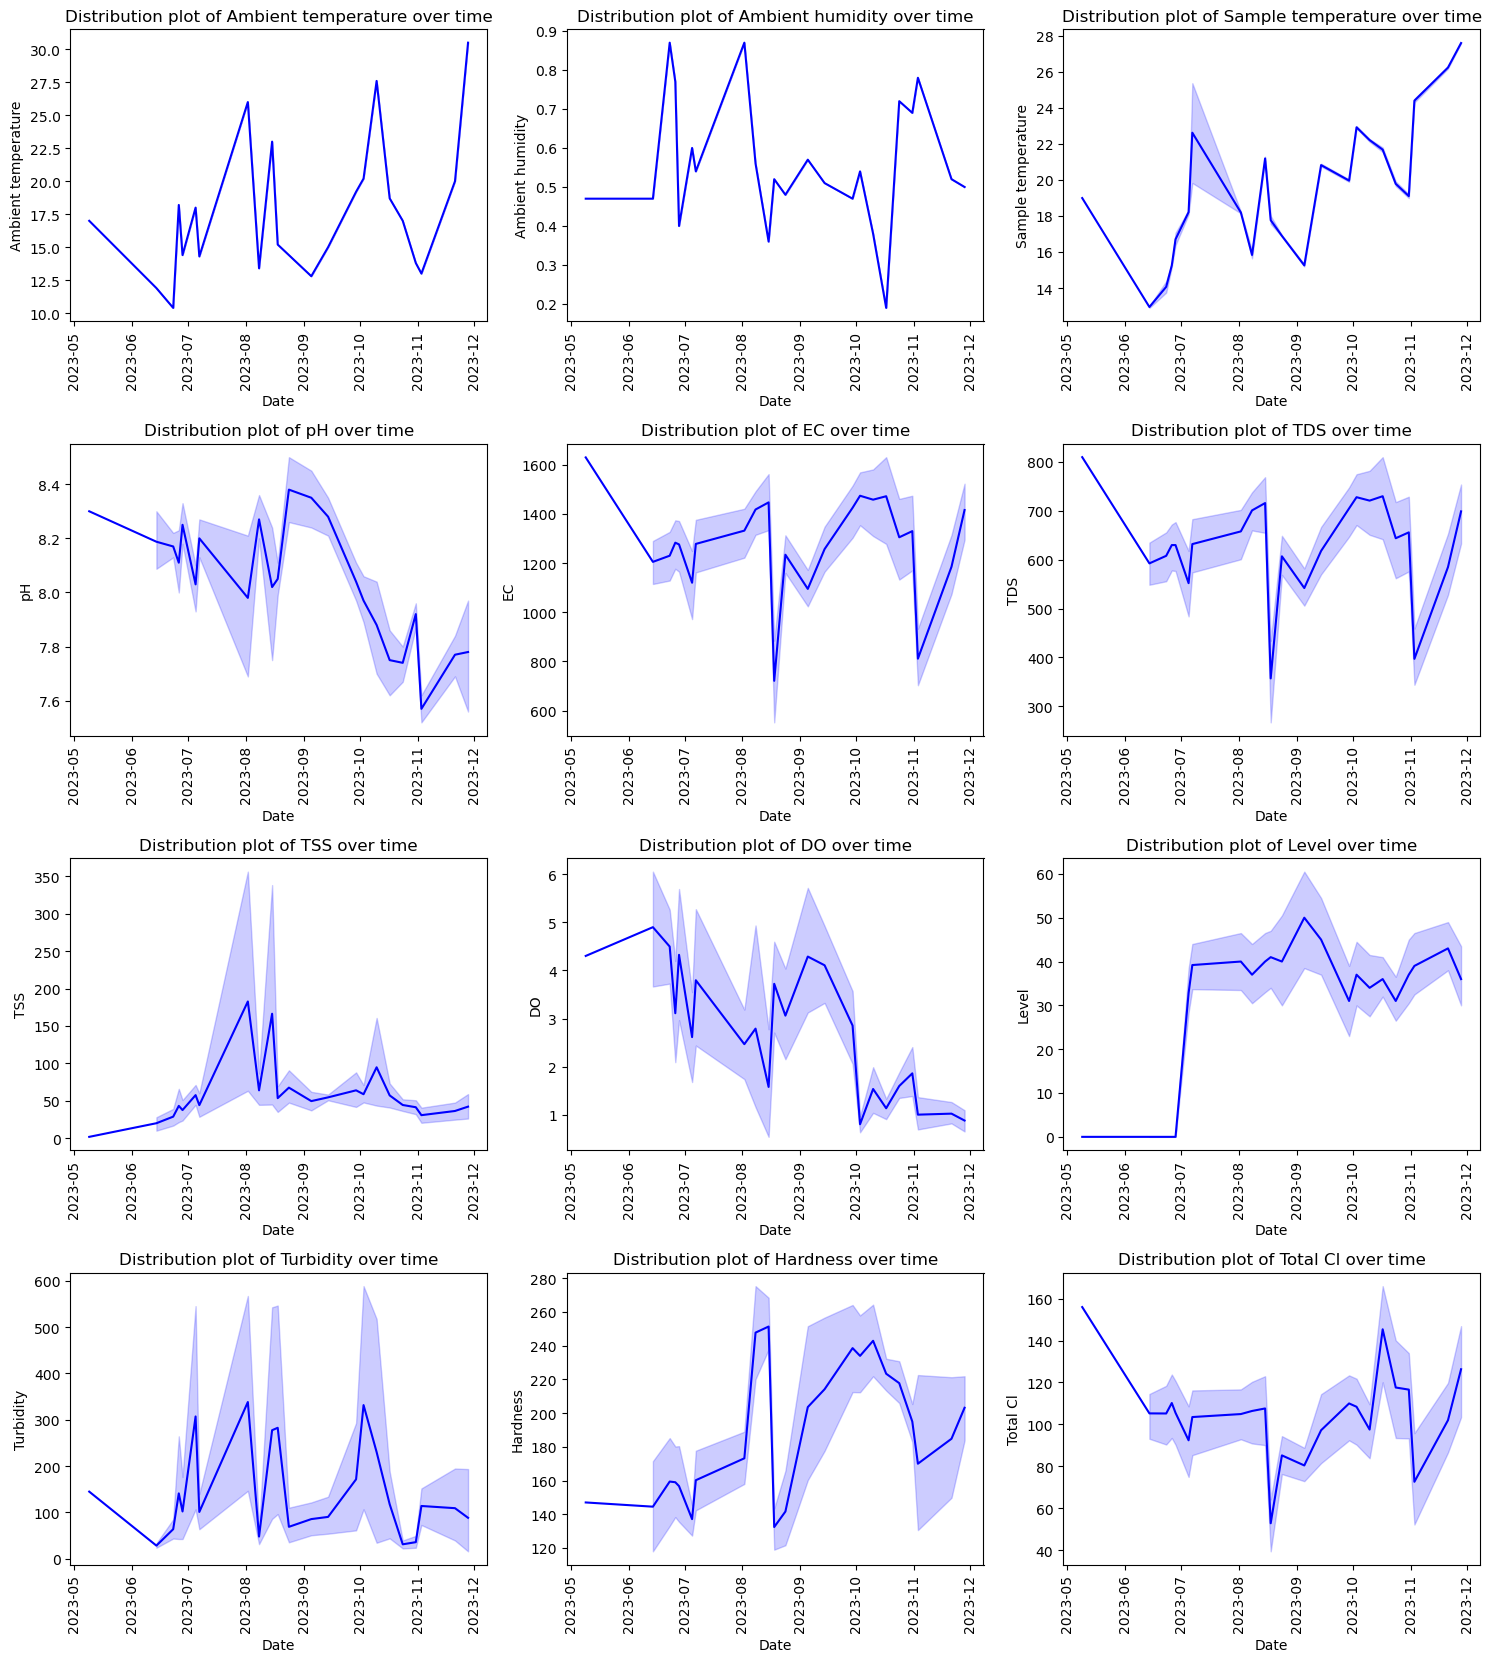

In [21]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.lineplot(x = 'Date', y = col, data = df, color = 'blue')
    plt.title(f'Distribution plot of {col} over time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

#### The PH of water and DO have decreased over the months while level and hardness have increased

## Overtime Changes

In [20]:
def improvement_calc(variable):
    improved=df.sort_values(by='Date',ascending=True)
    improvement = improved.groupby('Sampling point').agg({variable: ['first', 'last']})

# Calculate change and percentage change
    improvement['Change'] = improvement[variable]['last'] - improvement[variable]['first']
    improvement['Percentage Change'] = (improvement['Change'] / improvement[variable]['first']) * 100

# Reset index for better readability
    improvement.columns = ['First', 'Last', 'Change', 'Percentage Change']
    improvement = improvement.reset_index()

# Display the results
    return improvement

### PH improvement per region

In [22]:
improvement_calc('pH')

,Sampling point,First,Last,Change,Percentage Change
0,Arroyo Salguero,8.2,7.6,-0.6,-7.317073
1,Arroyo_Las Torres,8.3,8.2,-0.1,-1.204819
2,Puente Bilbao,8.3,7.8,-0.5,-6.024096
3,Puente Falbo,8.0,7.2,-0.8,-10.000000
4,Puente Irigoyen,8.2,7.9,-0.3,-3.658537


### Hardness improvemet

In [23]:
improvement_calc('Hardness')

,Sampling point,First,Last,Change,Percentage Change
0,Arroyo Salguero,208.0,245.0,37.0,17.788462
1,Arroyo_Las Torres,200.0,223.0,23.0,11.500000
2,Puente Bilbao,147.0,154.0,7.0,4.761905
3,Puente Falbo,139.0,200.0,61.0,43.884892
4,Puente Irigoyen,151.0,194.0,43.0,28.476821


## TDS improvement

In [36]:
improvement_calc('TDS')

,Sampling point,First,Last,Change,Percentage Change
0,Arroyo Salguero,460,500,40,8.695652
1,Arroyo_Las Torres,670,780,110,16.417910
2,Puente Bilbao,810,700,-110,-13.580247
3,Puente Falbo,620,740,120,19.354839
4,Puente Irigoyen,590,760,170,28.813559


# Observations


When considering the pH levels of the river water over the period of the research and sampling. The water in the Puente Falbo showed the highest improvement in terms of the pH level, moving from 8.0 at the beginining  to 7.2 at the end.Making the water from that river much safer than it was at the start of the experiment.

## Realtionships between variables 

In [43]:
def corr_plot(var1):
    df1=df[num_cols]
    correlation=df1.corr()[var1]
    return correlation

### PH 

In [44]:
corr_plot('pH')

Ambient temperature   -0.333460
Ambient humidity      -0.047242
Sample temperature    -0.500533
pH                     1.000000
EC                     0.026246
TDS                    0.024123
TSS                   -0.351795
DO                     0.626220
Level                 -0.099625
Turbidity             -0.337755
Hardness              -0.061794
Total Cl               0.003060
Name: pH, dtype: float64

### TDS

In [45]:
corr_plot('TDS')

Ambient temperature    0.328427
Ambient humidity      -0.235477
Sample temperature     0.106986
pH                     0.024123
EC                     0.999234
TDS                    1.000000
TSS                    0.248862
DO                    -0.278190
Level                  0.085420
Turbidity              0.167615
Hardness               0.248503
Total Cl               0.869567
Name: TDS, dtype: float64

### Hardness 

In [46]:
corr_plot('Hardness')

Ambient temperature    0.267437
Ambient humidity      -0.238396
Sample temperature     0.231949
pH                    -0.061794
EC                     0.245914
TDS                    0.248503
TSS                   -0.052685
DO                    -0.061773
Level                  0.103623
Turbidity             -0.186481
Hardness               1.000000
Total Cl               0.075962
Name: Hardness, dtype: float64

### **Key Environmental Metrics**

In [25]:
max_ph = df.loc[df['pH'].idxmax()]

max_temp = df.loc[df['Sample temperature'].idxmax()]

max_humidity = df.loc[df['Ambient humidity'].idxmax()]

min_tds = df.loc[df['TDS'].idxmin()]

print(f"Region with the highest pH: {max_ph['Sampling point']} at {max_ph['Time']} with pH {max_ph['pH']}")
print(f"Region with the highest temperature: {max_temp['Sampling point']} at {max_temp['Time']} with temperature {max_temp['Sample temperature']}°C")
print(f"Region with the highest humidity: {max_humidity['Sampling point']} at {max_humidity['Time']} with humidity {max_humidity['Ambient humidity']}%")
print(f"Cleanest region in terms of TDS: {min_tds['Sampling point']} with TDS {min_tds['TDS']}")

Region with the highest pH: Puente Bilbao at 15:20:00 with pH 8.7
Region with the highest temperature: Puente Irigoyen at 15:05:00 with temperature 28.1°C
Region with the highest humidity: Puente Bilbao at 12:30:00 with humidity 0.87%
Cleanest region in terms of TDS: Arroyo Salguero with TDS 140


## Observations